<a href="https://colab.research.google.com/github/aakhavi/Machine-Learning-in-Python/blob/main/GSB_545_AdaBoosting_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arash Akhavi
#AdaBoosting Activity
# 4/18/2022

In [ ]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
import scipy.stats as sps
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/GSB 545 Data/penguins_lter.csv")
data2 = pd.read_csv("/content/drive/MyDrive/GSB 545 Data/penguins_size.csv")
data.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
for label in data.columns:
    data[label] = LabelEncoder().fit(data[label]).transform(data[label])

In [ ]:
X = data.drop(['Species'],axis=1)
Y = data['Species']

In [ ]:
AdaBoost = AdaBoostClassifier(n_estimators=400,learning_rate=1,algorithm='SAMME')

AdaBoost.fit(X,Y)

prediction = AdaBoost.score(X,Y)

print('The accuracy is: ',prediction*100,'%')

The accuracy is:  99.12790697674419 %


In [ ]:
# Change hyperparameters
z = data.drop(['Species', 'Region', 'Island', 'Stage', 'Clutch Completion', 'Sex'],axis=1)
t = data['Species']

In [ ]:
AdaBoost = AdaBoostClassifier(n_estimators=400,learning_rate=1,algorithm='SAMME')

AdaBoost.fit(z,t)

prediction = AdaBoost.score(z,t)

print('The accuracy is: ',prediction*100,'%')

The accuracy is:  99.70930232558139 %


In [ ]:
# Change hyperparameters again
o = data.drop(['Species', 'Region', 'Island'],axis=1)
p = data['Species']

In [ ]:
AdaBoost = AdaBoostClassifier(n_estimators=400,learning_rate=1,algorithm='SAMME')

AdaBoost.fit(o,p)

prediction = AdaBoost.score(o,p)

print('The accuracy is: ',prediction*100,'%')

The accuracy is:  100.0 %


# It is interesting to see how including the whole receipe with all the predictors is not the best way to do things in terms of accuracy. This is to be expected. The more we think about what is really needed and what is not the better our model gets at classifying which species of penguin we are looking at based on the predictors.

In [ ]:
import pandas as pd
import numpy as np
import sklearn 
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

In [ ]:
# Bagging
X = data.drop(['Species'],axis=1)
Y = data['Species']

In [ ]:
# model prep
def evaluate_model(model, X, Y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, Y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
	return abs(scores)

In [ ]:
lm_model = LinearRegression()
scores = evaluate_model(lm_model, X, Y)
print("Base Linear Regression R^2:", np.mean(scores))

Base Linear Regression R^2: 0.9273907681337678


In [ ]:
# stacking prep
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('rf', RandomForestRegressor()))
    level0.append(('bag', BaggingRegressor()))
    level0.append(('lr_bag', BaggingRegressor(base_estimator= LinearRegression())))
    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

In [ ]:
def get_models():
    models = dict()
    models['knn'] = KNeighborsRegressor()
    models['cart'] = DecisionTreeRegressor()
    models["rf"] = RandomForestRegressor()
    models["bag"] = BaggingRegressor()
    models['svr'] = SVR()
    models['bag_lr'] = BaggingRegressor(base_estimator= LinearRegression())
    models['stacking'] = get_stacking()
    return models

In [ ]:
# evaluate model
results, names = list(), list()
models = get_models()
print("R^2 Scores (& Standard Deviation) of each respective model included in the stacking model")
for name, model in models.items():
	scores = evaluate_model(model, X, Y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

R^2 Scores (& Standard Deviation) of each respective model included in the stacking model
>knn 0.949 (0.039)
>cart 0.901 (0.100)
>rf 0.949 (0.045)
>bag 0.950 (0.042)
>svr 0.924 (0.029)
>bag_lr 0.928 (0.027)
>stacking 0.934 (0.026)


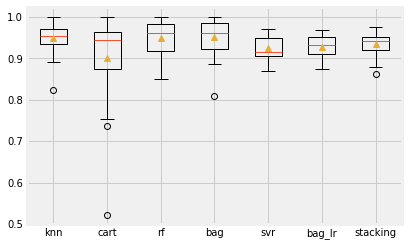

In [ ]:
plt.boxplot(results, labels=names, showmeans=True)
plt.show()